# Binary Classification using Neural Network

The following code shall be directed to segregate 2 different kinds of points (represented by red and blue) using binary classification in neural networks

### Imports and preprocessing of data

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Verifying tensorflow version
tf.__version__

'2.4.1'

In [3]:
# Reading data from csv file
data = pd.read_csv('spiral_data.csv')
data

,x,y,z
0,347.953000,310.113159,a
1,356.371315,276.785371,a
2,336.535599,346.903477,a
3,291.418533,330.128277,a
4,303.829037,307.755992,a
...,...,...,...
2826,84.813168,86.369708,b
2827,115.932489,29.304923,b
2828,103.315569,46.084928,b
2829,167.474553,70.017064,b


In [4]:
# Replacing the values of z column with 1 and 2 to feed into neural network
data = data.replace('a', 1)
data = data.replace('b', 0)

In [5]:
# Checking all unique values of the label (z) column
data['z'].unique()

array([1, 0])

In [6]:
# Splitting data into features and labels
X = data[['x', 'y']]
y = data['z']

In [7]:
# Checking shape of X and y (features and labels)
X.shape, y.shape

((2831, 2), (2831,))

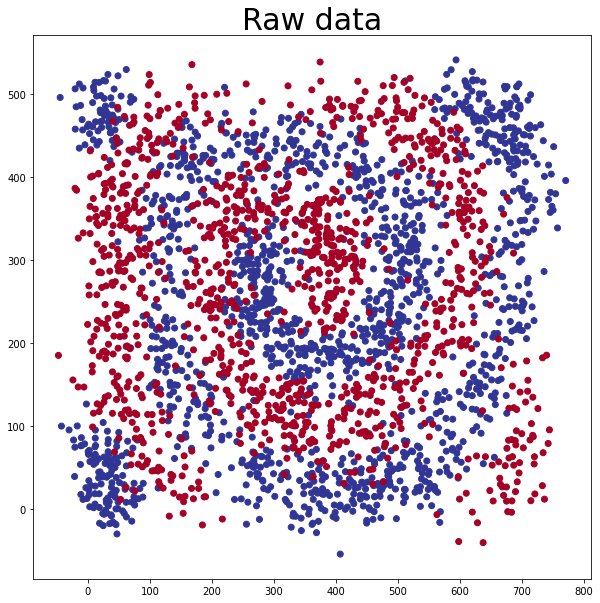

In [8]:
# Plotting the dataset
plt.figure(figsize=(10,10))
plt.scatter(X['x'], X['y'], c=y, cmap=plt.cm.RdYlBu)
plt.title("Raw data", fontdict={'fontsize':30})
plt.show();

### Model preparation 

In [9]:
# Splitting data using sklearn train_test_split
# Importing required function
from sklearn.model_selection import train_test_split

In [10]:
# Splitting the dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Validating shape of splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2264, 2), (567, 2), (2264,), (567,))

In [12]:
 # Scaling down the feature values between 0 and 1 for better learning in neural network
 # Importing required classes
 from sklearn.compose import make_column_transformer
 from sklearn.preprocessing import MinMaxScaler

In [13]:
# Creating a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["x", "y"]), # Turning all values in these columns between 0 and 1
)

# Fitting the column transformer to only training data
ct.fit(X_train)

# Transorming training and test data with normalizations (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
# Changing the arrays into tensors
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [15]:
# Checking out the normalized value
X_train_normal, X_test_normal

(array([[0.90330035, 0.29256334],
        [0.75827979, 0.4980371 ],
        [0.40934564, 0.4043107 ],
        ...,
        [0.38800912, 0.81387684],
        [0.38534638, 0.54920282],
        [0.74906499, 0.25535975]]), array([[0.53432188, 0.92072537],
        [0.41482698, 0.64246878],
        [0.41209739, 0.78185744],
        ...,
        [0.84675453, 0.91359765],
        [0.66186782, 0.96436286],
        [0.75647611, 0.4212829 ]]))

### Building the model

In [16]:
# Building the classifier model

# Setting random seed
tf.random.set_seed(42)

# Creating sequential model (using 7 hidden layers)
model= tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation="tanh"),
     tf.keras.layers.Dense(100, activation="tanh"),
     tf.keras.layers.Dense(50, activation="tanh"),
     tf.keras.layers.Dense(50, activation="tanh"),
     tf.keras.layers.Dense(10, activation="tanh"),
     tf.keras.layers.Dense(10, activation="tanh"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

#Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["accuracy"])

# Fitting the model on the training data
history = model.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
71/71 [==============================] - 1s 1ms/step - loss: 0.6809 - accuracy: 0.5810
Epoch 2/500
71/71 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5989
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5757
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6007
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5932
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6018
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5845
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5974
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5953
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5886
Epoch 11/

In [17]:
# Function to plot the decision boundary

def plot_decision_boundary(model, X, y): # Taking the model, features and labels as input
    
    # Defining min and maximum values for (x,y)
    x_min, x_max, y_min, y_max = X[:,0].min() -0.1, X[:,0].max() +0.1, X[:,1].min() -0.1, X[:,1].max() +0.1

    # Creating meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # creating input for model from the meshgrid
    x_in = np.c_[xx.ravel(), yy.ravel()]
        
    # Make predictions
    y_pred = model.predict(x_in)

    # Rounding the predictions and reshaping them
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plotting the predictions as a contour plot and the actual data points as scatter points
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### Evaluating the model

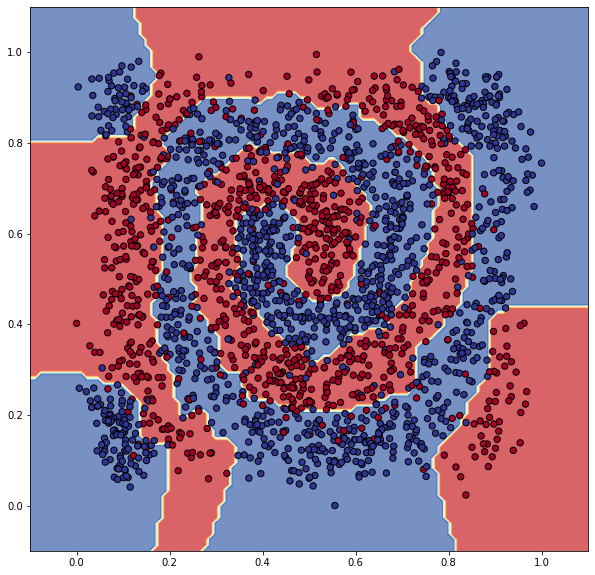

In [18]:
# Plotting the decision boundary for training dataset
plot_decision_boundary(model, np.array(X_train_normal), np.array(y_train))

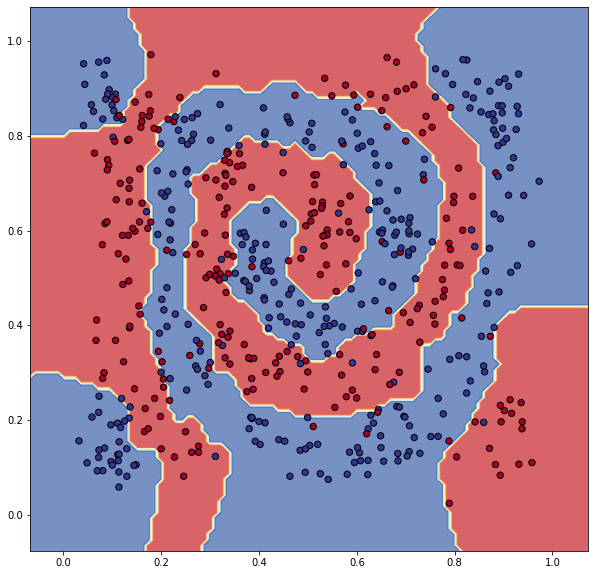

In [19]:
# Plotting the decision boundary for test dataset
plot_decision_boundary(model, np.array(X_test_normal), np.array(y_test))

In [20]:
# Evaluating the dataset
loss, accuracy = model.evaluate(X_test_normal, y_test)
print("Loss:\t\t",loss)
print("Accuracy:\t", accuracy)

18/18 [==============================] - 0s 967us/step - loss: 0.2857 - accuracy: 0.8959
Loss:		 0.2856641113758087
Accuracy:	 0.8959435820579529


In [21]:
# Some more metrics for model evaluation
# Importing required libraries
from sklearn import metrics

In [22]:
# defining predictions from model
y_preds = model.predict(X_test_normal)
y_preds = tf.squeeze(tf.round(y_preds))
y_preds

# precision ,recall and f1 score
precision = metrics.precision_score(y_test, y_preds)
recall = metrics.recall_score(y_test, y_preds)
F1 = metrics.f1_score(y_test, y_preds)

print("Precision Score:", precision)
print("Recall Score:\t", recall)
print("F1 Score:\t", F1)

Precision Score: 0.8939393939393939
Recall Score:	 0.9247648902821317
F1 Score:	 0.9090909090909091


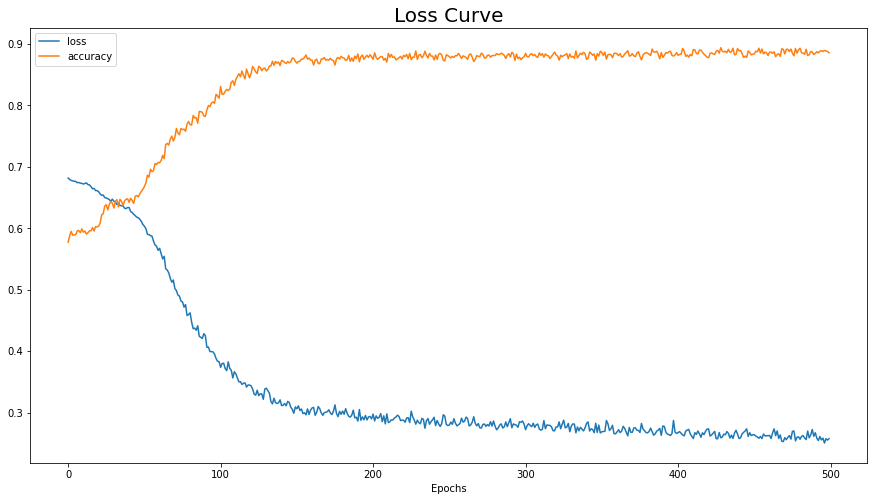

In [23]:
# Plotting the loss curve using the history of model fitting

# Creating a dataframe of history
df = pd.DataFrame(history.history)

# Creating a plot for loss and accuracy
plt.figure(figsize=(15,8))
plt.plot(df['loss'])
plt.plot(df['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.title("Loss Curve", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.show();

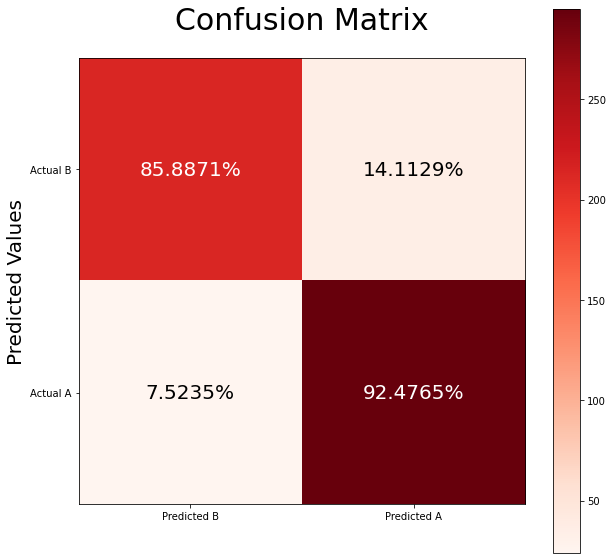

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Reds)
fig.colorbar(cax)

labels = ["B", "A"]
predicted_label = ["Predicted " + label for label in labels]
actual_label = ["Actual " + label for label in labels]


percentage_confusion_matrix = (confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100

ax.set_title("Confusion Matrix", fontsize=30, horizontalalignment='center')
ax.set_xticks(np.arange(len(confusion_matrix)))
ax.set_yticks(np.arange(len(confusion_matrix)))
ax.set_xticklabels(predicted_label)
ax.set_yticklabels(actual_label)
ax.set_ylabel("Actual Values", fontsize=20)
ax.set_ylabel("Predicted Values", fontsize=20)

# yticklabels=labels
ax.xaxis.tick_bottom()

for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[i])):
        plt.text(j, i, f"{percentage_confusion_matrix[i,j]:.04f}%",
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=20,
                 color= ("white" if percentage_confusion_matrix[i,j] > 50 else "black"))